In [4]:
import pandas as pd

arquivo = pd.read_csv("./educacao.csv")

display(arquivo.head(3))

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE


In [5]:
qtd_cursos = arquivo[["NOME_CURSO", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["NOME_CURSO", "REGIAO"]).sum()

qtd_cursos_final = qtd_cursos.query('QT_VAGAS_AUTORIZADAS != 0')

display(qtd_cursos_final)

QT_VAGAS_AUTORIZADAS
NOME_CURSO                         REGIAO                                 
ABI - ARTES VISUAIS                SUDESTE                               1
ABI - CIÊNCIAS BIOLÓGICAS          CENTRO-OESTE                         40
                                   SUDESTE                              82
ABI - CIÊNCIAS DA ATIVIDADE FÍSICA SUDESTE                              60
ABI - CIÊNCIAS DA NATUREZA         SUDESTE                              40
...                                                                    ...
ÓPTICA E OPTOMETRIA                IGNORADO/EXTERIOR                  1000
                                   NORDESTE                         123550
                                   NORTE                             38500
                                   SUDESTE                          184970
                                   SUL                               83900

[4657 rows x 1 columns]

In [6]:
df = pd.DataFrame(arquivo)

regiao = df[df['MUNICIPIO'] == 'São Paulo']

cursos = regiao[["NOME_CURSO", "NOME_IES", "MUNICIPIO", "UF", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["NOME_CURSO", "NOME_IES", "MUNICIPIO", "UF", "REGIAO"]).sum()

cursos_ativos = cursos.query('QT_VAGAS_AUTORIZADAS != 0')

display(cursos_ativos)

cursos_ativos.to_excel('cursos_sp.xlsx')

QT_VAGAS_AUTORIZADAS
NOME_CURSO                                         NOME_IES                                           MUNICIPIO UF REGIAO                       
ABI - ARTES VISUAIS                                UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUIT... São Paulo SP SUDESTE                     1
ABI - CIÊNCIAS DA ATIVIDADE FÍSICA                 UNIVERSIDADE DE SÃO PAULO                          São Paulo SP SUDESTE                    60
ABI - ENGENHARIA ELÉTRICA                          UNIVERSIDADE DE SÃO PAULO                          São Paulo SP SUDESTE                     2
ABI - MATEMÁTICA APLICADA                          UNIVERSIDADE DE SÃO PAULO                          São Paulo SP SUDESTE                    20
ACONSELHAMENTO TUTELAR PARA INFÂNCIA E ADOLESCÊ... CENTRO UNIVERSITÁRIO INTERNACIONAL                 São Paulo SP SUDESTE                  1500
...                                                                                                                                          ...
ÓPTICA E OPTOMETRIA                                CENTRO UNIVERSITÁRIO BRAZ CUBAS                    São Paulo SP SUDESTE                  2000
                                                   UNIVERSIDADE CIDADE DE SÃO PAULO                   São Paulo SP SUDESTE                  1000
                                                   UNIVERSIDADE CRUZEIRO DO SUL                       São Paulo SP SUDESTE                  1000
                                                   UNIVERSIDADE DE FRANCA                             São Paulo SP SUDESTE                   500
                                                   UNIVERSIDADE POSITIVO                              São Paulo SP SUDESTE                   500

[6265 rows x 1 columns]

In [7]:
df2 = pd.DataFrame(arquivo)

cidade = df2[df2['MUNICIPIO'] == 'São Paulo']

cursos_lins = cidade[["CATEGORIA_ADMINISTRATIVA", "QT_VAGAS_AUTORIZADAS"]].groupby("CATEGORIA_ADMINISTRATIVA").sum()

display(cursos_lins)

cursos_lins.to_excel("vagas_sp.xlsx")

,QT_VAGAS_AUTORIZADAS
CATEGORIA_ADMINISTRATIVA,
Privada com fins lucrativos,10500013
Privada sem fins lucrativos,2310697
Pública Estadual,105561
Pública Federal,5674
Pública Municipal,57545


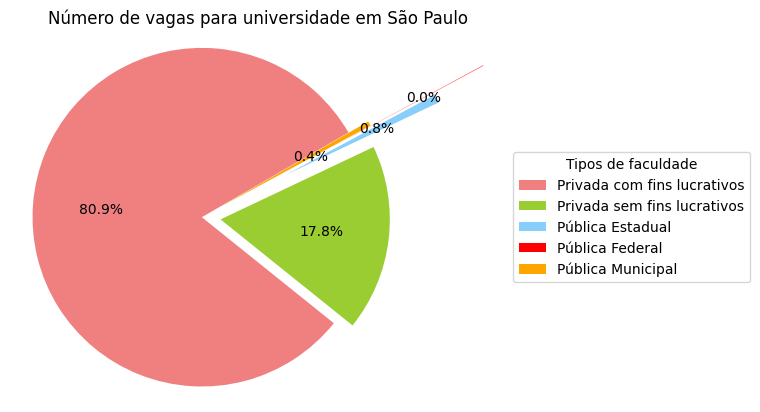

In [14]:
import matplotlib.pyplot as plt

arquivo2 = pd.read_excel("./vagas_sp.xlsx")

tipo_facu = arquivo2['CATEGORIA_ADMINISTRATIVA']
qtd_vagas = arquivo2['QT_VAGAS_AUTORIZADAS']

plt.title("Número de vagas para universidade em São Paulo")

explode = (0, 0.1, 0.5,0.8,0.12)
cores = ['lightcoral', 'yellowgreen', 'lightskyblue', 'red','orange']
plt.pie(qtd_vagas, explode=explode, colors=cores, startangle=30, autopct="%1.1f%%", radius=0.9)

legendas = plt.legend(tipo_facu, title="Tipos de faculdade" ,bbox_to_anchor=(1, 0.5), loc="center left")

plt.savefig('grafico_01.png', bbox_inches='tight')

plt.axis('equal')
plt.show()

In [13]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from PIL import Image

def criar_pdf(nome_arquivo, conteudo, imagem_path):
    # Cria um arquivo PDF
    pdf_canvas = canvas.Canvas(nome_arquivo, pagesize=letter)
    
    # Define a fonte e o tamanho
    pdf_canvas.setFont("Helvetica", 12)
    
    # Adiciona o texto à primeira página
    pdf_canvas.drawString(100, 750, "Projeto Final Kick")
    pdf_canvas.drawString(100, 730, "Fernando Marques dos Santos")
    pdf_canvas.drawString(100, 710, "Desigualdade na Educação")
    
    # Divide o conteúdo em linhas e adiciona à primeira página
    linhas = conteudo.split('\n')
    y = 690  # Posição vertical inicial
    for linha in linhas:
        pdf_canvas.drawString(100, y, linha)
        y -= 12  # Move para a próxima linha
    
    # Salva a primeira página
    pdf_canvas.showPage()

    # Adiciona a imagem à segunda página
    if imagem_path:
        pdf_canvas.drawImage(imagem_path, 100, 50, width=400, height=300)

    # Salva o arquivo PDF
    pdf_canvas.save()

if __name__ == "__main__":
    nome_arquivo = "projeto_final.pdf"
    conteudo = """
    A educação é um direito humano fundamental e um meio de promover
    o desenvolvimento social, econômico e cultural de uma sociedade.
    No entanto, nem todos os cidadãos têm as mesmas oportunidades de
    acesso à educação de qualidade, especialmente no nível superior.
    A desigualdade na educação é um problema que afeta milhões de 
    pessoas no Brasil e no mundo, e que tem consequências negativas
    para a democracia, a justiça e a inclusão.

    Um dos fatores que evidenciam a desigualdade na educação é a 
    distribuição desproporcional das vagas para universidades entre
    instituições públicas e privadas. As instituições públicas 
    geralmente oferecem ensino gratuito ou subsidiado, mas têm 
    um número limitado de vagas e uma alta exigência de desempenho 
    nos processos seletivos. As instituições privadas, por outro lado,
    têm um maior número de vagas e uma menor exigência de desempenho, 
    mas cobram mensalidades que nem todos os estudantes podem pagar.

    Um exemplo dessa situação pode ser observado no estado de São Paulo,
    o mais populoso e rico do Brasil. De acordo com o gráfico apresentado,
    80,9% das vagas para universidades em São Paulo são oferecidas por 
    instituições privadas, enquanto apenas 17,8% são oferecidas por instituições 
    públicas. Essa distribuição desigual do acesso à educação superior é um fator 
    que contribui para a desigualdade social no estado de São Paulo, pois cria uma 
    barreira econômica para os estudantes de baixa renda e perpetua as diferenças 
    de oportunidades entre as classes sociais.

    Para combater a desigualdade na educação, é preciso investir mais recursos públicos
    na ampliação e na qualidade das vagas para universidades públicas, bem como na 
    criação de políticas de inclusão e de assistência estudantil. Além disso, é 
    preciso fiscalizar e regular as instituições privadas, para garantir que elas
    cumpram os padrões de qualidade e de ética educacional. Somente assim, será 
    possível garantir o direito à educação para todos os cidadãos e construir uma
    sociedade mais justa e democrática.
    """
    imagem_path = "./grafico_01.png"  # Substitua pelo caminho real da sua imagem

    criar_pdf(nome_arquivo, conteudo, imagem_path)
    print(f"O arquivo PDF '{nome_arquivo}' foi criado com sucesso.")


O arquivo PDF 'projeto_final.pdf' foi criado com sucesso.
